In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
#tf.keras.datasets have a lot of preloaded datasets that you can directly use
# More details can be found here: https://www.tensorflow.org/api_docs/python/tf/keras/datasets
# Image classification dataset: 
#   a. CIFAR-10: https://www.cs.toronto.edu/~kriz/cifar.html
#   b. CIFAR-100: https://www.cs.toronto.edu/~kriz/cifar.html
#   c. MNIST: http://yann.lecun.com/exdb/mnist/
#   d. Fashion-MNIST: https://github.com/zalandoresearch/fashion-mnist

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


In [3]:
# Reshape input data from (28, 28) to (28, 28, 1)
# You can also make use of the same shapes for the MNIST dataset.
img_width, img_height, channels = 28, 28,1

In [4]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [5]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

y = 1000 Trouser


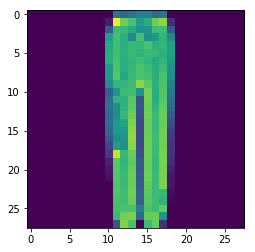

In [6]:
# Image index, you can pick any number between 0 and 59,999
index = 1000
labelIndex = y_train[index]
print ("y = " + str(index) + " " +(fashion_mnist_labels[labelIndex]))
plt.imshow(x_train[index])

In [7]:
plt.set_cmap('Greys')

<Figure size 432x288 with 0 Axes>

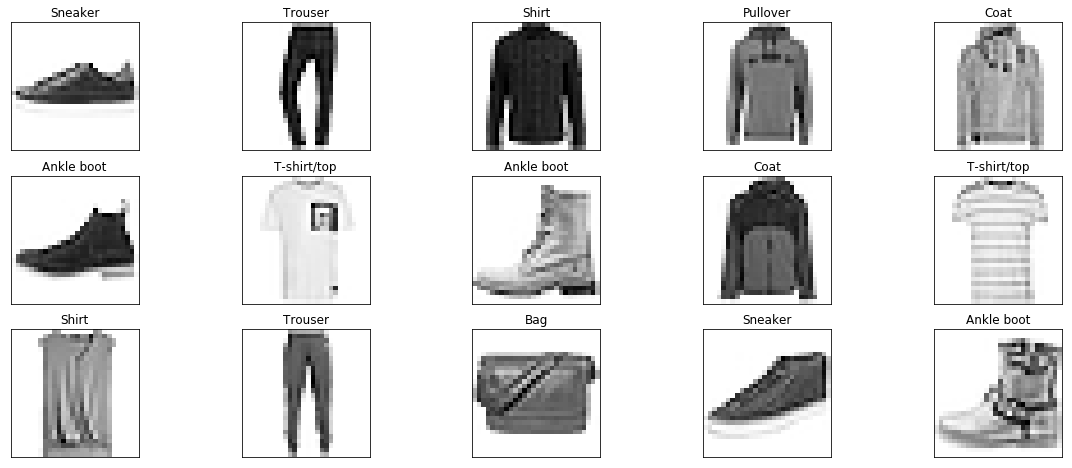

In [8]:
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(x_train[index])
    labelIndex = y_train[index]
    # Set the title for each image
    ax.set_title("{}".format(fashion_mnist_labels[labelIndex]))

## Data Normalization

In [9]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [10]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]


x_train = x_train.reshape(x_train.shape[0], img_width, img_height, channels)
x_valid = x_valid.reshape(x_valid.shape[0], img_width, img_height, channels)
x_test = x_test.reshape(x_test.shape[0], img_width, img_height, channels)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


## Create the Model Architecture

We will make use of the Keras Sequential API (https://keras.io/getting-started/sequential-model-guide/). The sequential model is a linear stack of layers. 

In [11]:
model = tf.keras.Sequential()

We will try to build a simple shallow neural network calle LeNet-5 (http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf) 

In [12]:
# Must define the input shape in the first layer of the neural network
#layer 1: Convolution
model.add(tf.keras.layers.Conv2D(filters = 64, 
                 kernel_size = 2, 
                 strides = 1, 
                 activation = 'relu', 
                 input_shape = (img_width,img_height,channels)))
#Pooling layer 1
model.add(tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 2))
model.add(tf.keras.layers.Dropout(0.3))


#Layer 2
#Conv Layer 2
model.add(tf.keras.layers.Conv2D(filters = 32, 
                 kernel_size = 2,
                 strides = 1,
                 activation = 'relu'))
#Pooling Layer 2
model.add(tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 2))
model.add(tf.keras.layers.Dropout(0.3))


#Flatten
model.add(tf.keras.layers.Flatten())
#Layer 3
#Fully connected layer 1
model.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))
#Layer 4
#Fully connected layer 2
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
#Layer 5
#Output Layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

# Must define the input shape in the first layer of the neural network
bmodel.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [13]:
# Take a look at the model summary
#total_params =(filter_height * filter_width * input_image_channels + 1) * number_of_filters
#For layer 1:
# when our filter size is 2; we have (2*4*1+1)*64 =  320 Parameters
# For LeNet-5: filters = 6,kernel_size = 5; (5*5*1+1)*6 = 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 27, 27, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
__________

In [14]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [15]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=1,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Using TensorFlow backend.


Train on 55000 samples, validate on 5000 samples
Epoch 1/1
55000/55000 [==============================] - 32s 588us/step - loss: 0.5675 - acc: 0.7902 - val_loss: 0.4037 - val_acc: 0.8504

Epoch 00001: val_loss improved from inf to 0.40374, saving model to model.weights.best.hdf5


In [16]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8394


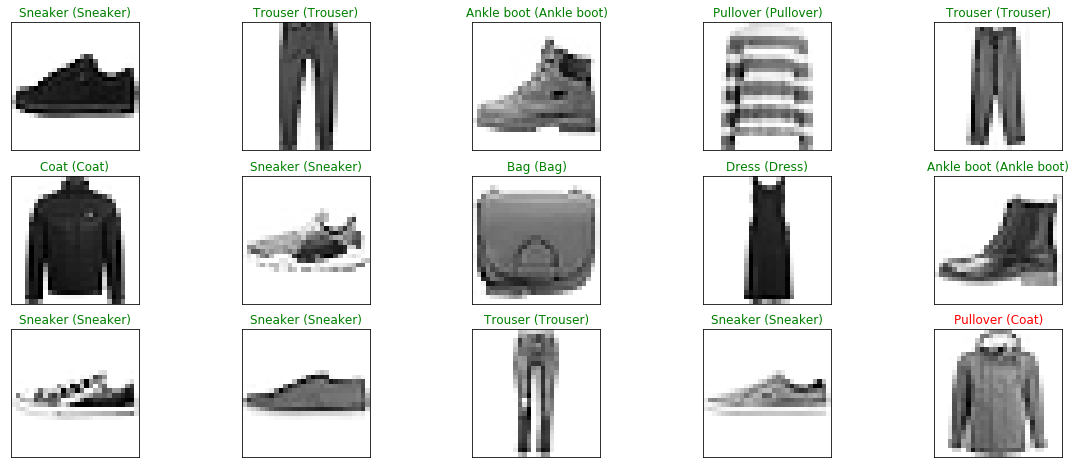

In [17]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predictedIndex = int(np.argmax(y_hat[index]))
    actualIndex = int(np.argmax(y_test[index]))
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predictedIndex], 
                                  fashion_mnist_labels[actualIndex]),
                                  color=("green" if predictedIndex == actualIndex else "red"))

## Visualize the layers

In [18]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + tf.keras.backend.epsilon())
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if tf.keras.backend.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [19]:
def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (tf.keras.backend.sqrt(tf.keras.backend.mean(tf.keras.backend.square(x))) + tf.keras.backend.epsilon())


In [20]:
input_img = model.input

In [21]:
layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])

In [22]:
layer_dict

{'max_pooling2d_1': <tensorflow.python.keras._impl.keras.layers.pooling.MaxPooling2D at 0x7f84e2bea240>,
 'dropout_1': <tensorflow.python.keras._impl.keras.layers.core.Dropout at 0x7f84e2beac18>,
 'conv2d_2': <tensorflow.python.keras._impl.keras.layers.convolutional.Conv2D at 0x7f84e2beaeb8>,
 'max_pooling2d_2': <tensorflow.python.keras._impl.keras.layers.pooling.MaxPooling2D at 0x7f84e2beafd0>,
 'dropout_2': <tensorflow.python.keras._impl.keras.layers.core.Dropout at 0x7f84e29bac18>,
 'flatten_1': <tensorflow.python.keras._impl.keras.layers.core.Flatten at 0x7f84e2beacc0>,
 'dense_1': <tensorflow.python.keras._impl.keras.layers.core.Dense at 0x7f84e7d9ecf8>,
 'dense_2': <tensorflow.python.keras._impl.keras.layers.core.Dense at 0x7f84e7d01a90>,
 'dense_3': <tensorflow.python.keras._impl.keras.layers.core.Dense at 0x7f84e7d01908>}

In [23]:
layer_name = 'conv2d_2'

In [24]:
kept_filters = []
for filter_index in range(16):
    # we only scan through the first 200 filters,
    # but there are actually 512 of them
    print('Processing filter %d' % filter_index)
    start_time = time.time()

    # we build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer_dict[layer_name].output
    if tf.keras.backend.image_data_format() == 'channels_first':
        loss = tf.keras.backend.mean(layer_output[:, filter_index, :, :])
    else:
        loss = tf.keras.backend.mean(layer_output[:, :, :, filter_index])

    # we compute the gradient of the input picture wrt this loss
    grads = tf.keras.backend.gradients(loss, input_img)[0]

    # normalization trick: we normalize the gradient
    grads = normalize(grads)

    # this function returns the loss and grads given the input picture
    iterate = tf.keras.backend.function([input_img], [loss, grads])

    # step size for gradient ascent
    step = 1.

    # we start from a gray image with some random noise
    if tf.keras.backend.image_data_format() == 'channels_first':
        input_img_data = np.random.random((1, 3, img_width, img_height))
    else:
        input_img_data = np.random.random((1, img_width, img_height, 1))
    input_img_data = (input_img_data - 0.5) * 20 + 128

    # we run gradient ascent for 20 steps
    for i in range(20):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

        print('Current loss value:', loss_value)
        if loss_value <= 0.:
            # some filters get stuck to 0, we can skip them
            break

    # decode the resulting input image
    if loss_value > 0:
        img = deprocess_image(input_img_data[0])
        kept_filters.append((img, loss_value))
    end_time = time.time()
    print('Filter %d processed in %ds' % (filter_index, end_time - start_time))


Processing filter 0
Current loss value: 0.0
Filter 0 processed in 0s
Processing filter 1
Current loss value: 0.4079913
Current loss value: 1.1086379
Current loss value: 1.9641342
Current loss value: 2.873669
Current loss value: 3.8457441
Current loss value: 4.8493032
Current loss value: 5.867174
Current loss value: 6.8935103
Current loss value: 7.928309
Current loss value: 8.970733
Current loss value: 10.017611
Current loss value: 11.070934
Current loss value: 12.131815
Current loss value: 13.212589
Current loss value: 14.302187
Current loss value: 15.409075
Current loss value: 16.538818
Current loss value: 17.674826
Current loss value: 18.817892
Current loss value: 19.970991
Filter 1 processed in 0s
Processing filter 2
Current loss value: 0.0
Filter 2 processed in 0s
Processing filter 3
Current loss value: 0.0
Filter 3 processed in 0s
Processing filter 4
Current loss value: 0.0
Filter 4 processed in 0s
Processing filter 5
Current loss value: 0.0
Filter 5 processed in 0s
Processing fil